In [2]:
import pygsp
from plotly import express as px
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
G = pygsp.graphs.SwissRoll(N=100, lap_type='combinatorial')
G.compute_fourier_basis(n_eigenvectors=5)
df = pd.DataFrame(G.coords, columns=['x','y','z'])


In [4]:
fig = px.scatter_3d(df, x='x',y='y',z='z',color=G.U[:,1],height = 600, width=800,color_continuous_scale=px.colors.sequential.Plasma_r)
fig.show()

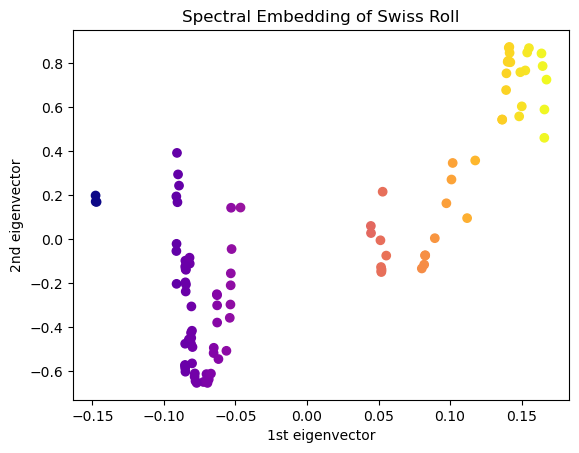

In [5]:
plt.scatter(G.U[:,1],G.coords[:,2], c = G.U[:,1],cmap="plasma")
plt.title('Spectral Embedding of Swiss Roll')
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')

plt.show()

In [6]:
labels = (np.hstack([0*np.ones((17,)),1*np.ones((17,)),2*np.ones((16,))])).astype(int)
G =pygsp.graphs.StochasticBlockModel(N=50, k=3,z=labels,p = 0.5,q=0.015, seed = 100, lap_type='normalized')

In [7]:
G.set_coordinates('spring', seed=102)

/Users/hugofluhr/miniconda3/envs/gsp/lib/python3.11/site-packages/pygsp/plotting.py:546: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



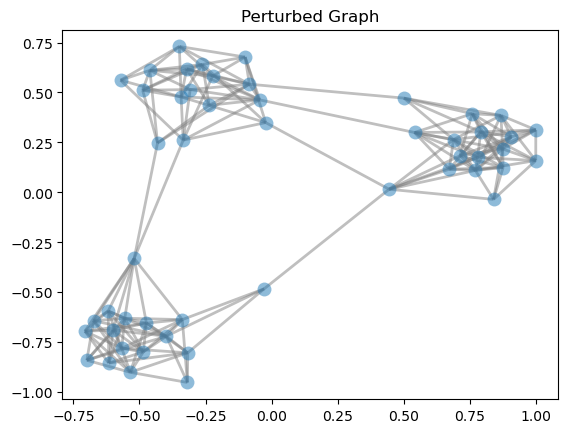

In [8]:
fig,ax = plt.subplots(1,1)
G.plot(ax=ax, title='Perturbed Graph')
plt.show()

In [9]:
fig.savefig("/Users/hugofluhr/chuv/figures/spectral_clustering/toy_graph.svg")

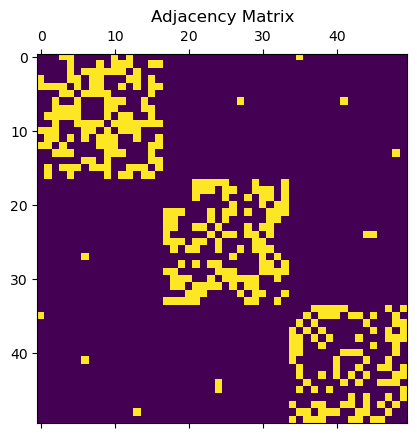

In [10]:
fig, ax = plt.subplots(1,1)
ax.matshow(G.A.toarray())
plt.title('Adjacency Matrix')
#plt.axis('off')
plt.show()

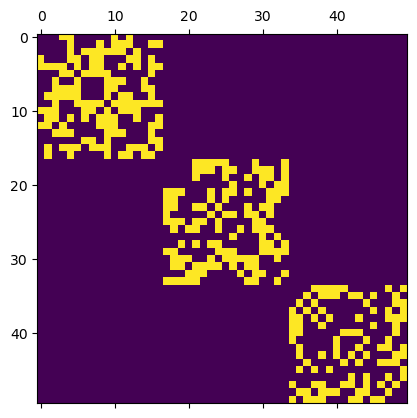

In [11]:
correction = np.zeros_like(G.A.toarray())
correction[6,27]=1
correction[0,35]=1
correction[6,41]=1
correction[13,48]=1
correction[24,44:46]=1
correction+=correction.T
fig, ax = plt.subplots(1,1)
ax.matshow(G.A.toarray().astype(int)-correction)

In [12]:
adj_ideal = G.A.toarray().astype(int)-correction
Gideal = pygsp.graphs.Graph(adj_ideal, lap_type='normalized')

In [13]:
Gideal.compute_fourier_basis()

/Users/hugofluhr/miniconda3/envs/gsp/lib/python3.11/site-packages/pygsp/plotting.py:546: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: title={'center': 'Ideal Graph'}>)

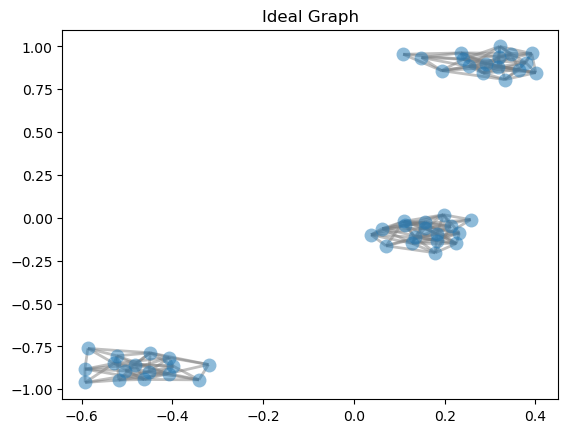

In [14]:
Gideal.set_coordinates('spring')
Gideal.plot(title='Ideal Graph')

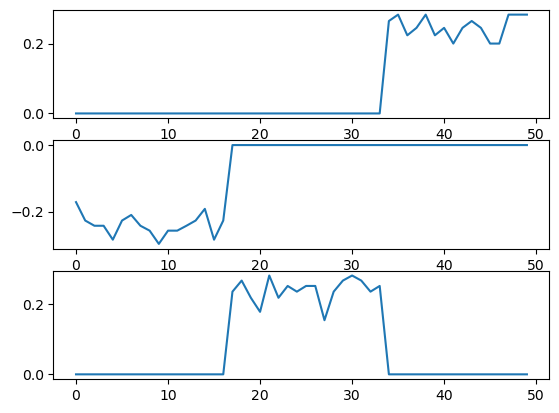

In [15]:

fig, axs = plt.subplots(3,1)
axs[0].plot(Gideal.U[:,0])
axs[1].plot(Gideal.U[:,1])
axs[2].plot(Gideal.U[:,2])

In [16]:
G.compute_fourier_basis()

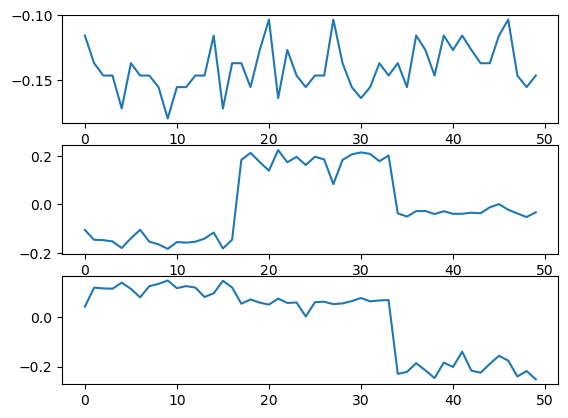

In [17]:
fig, axs = plt.subplots(3,1)
axs[0].plot(G.U[:,0])
axs[1].plot(G.U[:,1])
axs[2].plot(G.U[:,2])

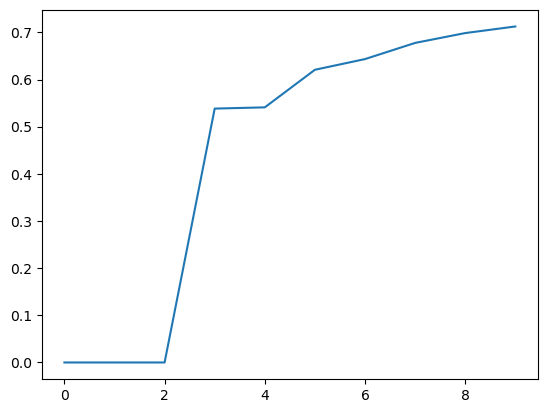

In [19]:
plt.plot(Gideal.e[:10])

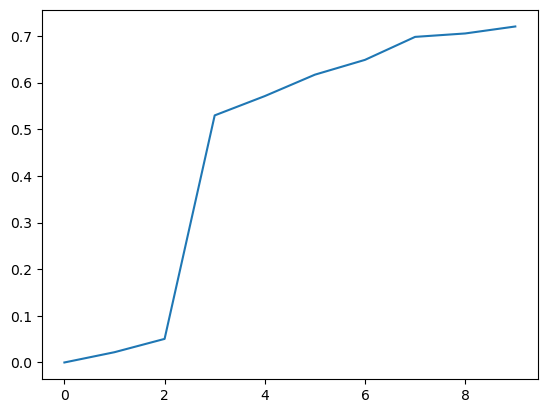

In [20]:
plt.plot(G.e[:10])